In [1]:
!pip install geoplot
!pip install contextily
!pip install altair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 17.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 15.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.3 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=10808153 sha256=95cef6c52d8812438866796cad605fd6f8e61aafb45342f1bd7b24137be7840a
  Stored in directory: /home/onyxia/.cache/pip/wheels/86/ba/b2/0c86d61684e55c9fa1d989634773b791b8b24e5f44a183088a
Successfully built cartopy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.8/812.8 kB 17.7 MB/s eta 0:00:00a 0:00:01


In [2]:
import pandas as pd 
import geopandas as gpd 
import nltk
nltk.download('punkt')
import contextily as ctx
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import folium
import numpy as np
import seaborn as sns
import altair as alt 

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


# Part I : Obtention du dataframe 
## 1.1.Récupération des loyers, des surfaces et de la localisation des résidences

In [3]:
df = pd.read_csv("fr_crous_logement_france_entiere.csv", sep =';')


In [4]:
df = df[["title", "infos", "address" ,"geocalisation", "regions"]]

In [5]:
from functions_for_data_cleaning import *

df = get_loyer(df)
df = get_surface(df)
df = get_localisation(df) 
df


[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,title,infos,address,geocalisation,regions,Loyer,Max Loyer,Min Loyer,Mean Loyer,Surface,Max Surface,Min Surface,Mean Surface,Longitude,Latitude,geometry
0,Résidence Vauban,Description La résidence est située au cœur de...,1 boulevard d’Alembert 78280 Guyancourt,"48.7796516418,2.0441513062",Île-de-France,"[333.0, 537.0]",537.00,333.00,435.000000,[],NaN,NaN,NaN,2.044151,48.779652,POINT (2.04415 48.77965)
1,Résidence Le Square de l'Echiquier,DescriptionRésidence universitaire nouvellemen...,9 square de l'échiquier 95800 Cergy-Pontoise,"49.0482978821,2.02688694",Île-de-France,[334.0],334.00,334.00,334.000000,[],NaN,NaN,NaN,2.026887,49.048298,POINT (2.02689 49.04830)
2,Résidence Les Bas Longchamps,Description Résidence universitaire située à p...,2 rue Abraham Lincoln 92220 Bagneux,"48.7906913757,2.3169708252",Île-de-France,"[332.0, 359.0]",359.00,332.00,345.500000,"[17.0, 28.0]",28.0,17.0,22.500000,2.316971,48.790691,POINT (2.31697 48.79069)
3,Résidence de l’Ile,Description Résidence universitaire située à p...,14 rue du Docteur Collé - bâtiment 227 du camp...,"48.698802948,2.1578958035",Île-de-France,[362.0],362.00,362.00,362.000000,[18.0],18.0,18.0,18.000000,2.157896,48.698803,POINT (2.15790 48.69880)
4,Résidence La Pacaterie,Description Résidence universitaire longée par...,Bâtiment 499 - rue de la Pacaterie 91400 Orsay,"48.7015419006,2.1846776009",Île-de-France,[154.0],154.00,154.00,154.000000,[],NaN,NaN,NaN,2.184678,48.701542,POINT (2.18468 48.70154)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,Cité Grémillon (secteur d'Hérouville-Saint-Clair),BP 54 - Avenue de la Grande Cavée 14202 Hérouv...,BP 54 - Avenue de la Grande Cavée 14202 Hérouv...,"49.2032051086,-0.3392136097",Normandie,"[249.85, 312.9, 388.6, 467.4, 525.0, 556.14]",556.14,249.85,416.648333,"[9.0, 18.0, 30.0, 49.0, 65.0, 69.0]",69.0,9.0,40.000000,-0.339214,49.203205,POINT (-0.33921 49.20321)
784,Résidence Antide Janvier,"Localisation :\r\n Au centre ville, à proximit...",6 rue Antide Janvier 25000 Besançon,"47.2365074158,6.0153431892",Bourgogne-Franche-Comté,"[347.0, 502.0, 523.0]",523.00,347.00,457.333333,"[19.0, 35.3]",35.3,19.0,27.150000,6.015343,47.236507,POINT (6.01534 47.23651)
785,Résidence Jean Paul Sartre,Localisation :\r\n La résidence Sartre est sit...,Rue Gaston Deferre 90000 Belfort,"47.6389884949,6.8537139893",Bourgogne-Franche-Comté,"[280.0, 311.0, 361.0, 405.0, 416.0, 466.0, 586.0]",586.00,280.00,403.571429,"[18.0, 36.0, 51.5]",51.5,18.0,35.166667,6.853714,47.638988,POINT (6.85371 47.63899)
786,Maret,NaN,3 rue du Docteur Maret 21000 Dijon,"47.3224983215,5.0353322029",Bourgogne-Franche-Comté,None,NaN,NaN,NaN,None,NaN,NaN,NaN,5.035332,47.322498,POINT (5.03533 47.32250)


## 1.2.Récupération des loyers privés des communes (avec la géolocalisation des communes)

In [6]:
df_private = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/8fac6fb7-cd07-4747-8e0b-b101c476f0da", encoding= 'unicode_escape', sep = ";")


On ne garde que le code INSEE, le nom de la ville et le loyer supérieur par m^2


In [7]:
df_private = df_private[["INSEE", "LIBGEO","upr.IPm2"]]

On renomme la colonne INSEE en codgeo pour pouvoir la merger avec la carte des contours des villes.

In [8]:
df_private.rename(columns = {'INSEE':'codgeo',"upr.IPm2" : "Loyer_prive_m2" }, inplace = True)

In [9]:
"""
On rajoute un 0 devant le code INSEE quand il ne fait que quatre chiffres (pour uniformiser avec l'autre base).
"""
df_private["codgeo"] = df_private["codgeo"].apply(lambda x : "0" + x if len(x) == 4 else x)


In [10]:
df_private = df_private.set_index('codgeo') #on réindex le dataframe avec le code INSEE pour merger après. 

On récuppère les contours géographique des communes.(prends du temps)

In [11]:
gdf_communes_boundaries = gpd.read_file("https://www.data.gouv.fr/fr/datasets/r/e9391593-fa95-4153-aabe-87ca84d197e9")

On ne garde que le code INSEE et les données polygoniales. 

In [12]:
gdf_communes_boundaries.rename(columns = {'INSEE_COM':'codgeo'}, inplace = True)
gdf_communes_boundaries = gdf_communes_boundaries[["codgeo", "geometry"]]
gdf_communes_boundaries = gdf_communes_boundaries.set_index('codgeo')


On concatène les deux datafarmes

In [13]:
gdf_private = pd.concat([df_private,gdf_communes_boundaries], axis = 1, join = "inner")

## 1.3. Jointures spatiales

In [14]:

#gdf_private['geometry'] = gdf_private['geometry'].apply(wkt.loads) #on transforme en format wkt (sinon ça ne marche pas)
gdf_private = gpd.GeoDataFrame(gdf_private)  #on transforme en geodataframe 
df = gpd.sjoin(df, gdf_private, how='left', op='within') #on réalise la jointure à gauche avec within 
#i.e si le point est dans le polynôme. 

/opt/mamba/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_222/2580680376.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  df = gpd.sjoin(df, gdf_private, how='left', op='within') #on réalise la jointure à gauche avec within


In [15]:
del df['index_right'] #on supprime l'index right pour la prochaine jointure


## 1.4 Ajout des départements 

In [16]:
gdf_dep = gpd.read_file("https://www.data.gouv.fr/fr/datasets/r/eb36371a-761d-44a8-93ec-3d728bec17ce")
gdf_dep.rename(columns = {'nom':'departement'}, inplace = True)
gdf_dep = gdf_dep[["departement", "geometry"]]
gdf_dep

,departement,geometry
0,La Réunion,"MULTIPOLYGON (((55.21643 -21.03904, 55.21652 -..."
1,Aude,"POLYGON ((1.68872 43.27368, 1.69001 43.27423, ..."
2,Haute-Loire,"POLYGON ((3.08206 45.28988, 3.08209 45.29031, ..."
3,Bouches-du-Rhône,"MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4..."
4,Lot-et-Garonne,"POLYGON ((-0.14058 44.22648, -0.12931 44.23218..."
...,...,...
97,Morbihan,"MULTIPOLYGON (((-3.73508 48.11140, -3.73507 48..."
98,Doubs,"POLYGON ((5.69876 47.26464, 5.69877 47.26481, ..."
99,Jura,"MULTIPOLYGON (((5.25202 46.94451, 5.25208 46.9..."
100,Ardèche,"POLYGON ((3.86110 44.71118, 3.86110 44.71151, ..."


In [17]:
df = gpd.sjoin(df, gdf_dep, how='left', op='within')


/opt/mamba/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_222/3352756710.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  df = gpd.sjoin(df, gdf_dep, how='left', op='within')


In [18]:
del df['index_right'] #on supprime l'index right pour la prochaine jointure

## 1.5. Association de résidences à une école 

In [19]:
df.crs = "epsg:4326" #on définit la projection de notre dataframe

In [95]:
"""
Import de notre base de données des écoles 
"""
df_schools = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/0c713161-26fb-415e-ac1d-8769125f338d", sep = ";")

In [96]:
df_schools

,attention,annee_universitaire,etablissement_type,etablissement_typologie,etablissement_id_paysage,etablissement_lib,etablissement_id_wikidata,etablissement_id_ror,etablissement_id_uai,etablissement_localisation,...,etablissement_id_departement,etablissement_departement,etablissement_id_uucr,etablissement_uucr,etablissement_code_commune,etablissement_commune,etablissement_id_paysage_actuel,etablissement_actuel_lib,rentree,annee
0,Sans double compte des établissements-composan...,2006-07,Université,Université pluridisciplinaire avec santé,06SE7,Université de Bretagne Occidentale,Q1857334,01b8h3982,0290346U,Bretagne>Rennes>Finistère>Brest,...,D029,Finistère,UU29701,Brest,29019,Brest,06SE7,Université de Bretagne Occidentale,2006,2007
1,Sans double compte des établissements-composan...,2006-07,Université,Université tertiaire - droit et économie,542Id,Université Toulouse Capitole,Q590201,0443n9e75,0311382J,Occitanie>Toulouse>Haute-Garonne>Toulouse,...,D031,Haute-Garonne,UU00758,Toulouse,31555,Toulouse,542Id,Université Toulouse Capitole,2006,2007
2,Sans double compte des établissements-composan...,2006-07,Autre établissement,NaN,5y7lF,Institut universitaire de formation des maître...,NaN,NaN,9730224F,Guyane>Cayenne,...,D973,Guyane,UU9C601,Cayenne,97302,Cayenne,hy4EW,Université de Guyane,2006,2007
3,Sans double compte des établissements-composan...,2006-07,Université,Université pluridisciplinaire avec santé,7hB8r,Université de Nantes,Q259388,03gnr7b55,0440984F,Pays de la Loire>Nantes>Loire-Atlantique>Nantes,...,D044,Loire-Atlantique,UU44701,Nantes,44109,Nantes,qUCQp,Nantes Université,2006,2007
4,Sans double compte des établissements-composan...,2006-07,École,NaN,8618D,École normale supérieure PSL,Q83259,05a0dhs15,0753455Y,Île-de-France>Paris>Paris 5e,...,D075,Paris,UU00851,Paris,75105,Paris 5e,8618D,École normale supérieure PSL,2006,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,Sans double compte des établissements-composan...,2021-22,École,NaN,tdEpy,École nationale supérieure de l'électronique e...,Q2707341,03qeacd72,0951376E,Île-de-France>Versailles>Val-d'Oise>Paris>Cergy,...,D095,Val-d'Oise,UU00851,Paris,95127,Cergy,tdEpy,École nationale supérieure de l'électronique e...,2021,2022
2284,Sans double compte des établissements-composan...,2021-22,Université,Université pluridisciplinaire avec santé,vb71K,Université Paris-Est Créteil,Q980688,05ggc9x40,0941111X,Île-de-France>Créteil>Val-de-Marne>Paris>Créteil,...,D094,Val-de-Marne,UU00851,Paris,94028,Créteil,vb71K,Université Paris-Est Créteil,2021,2022
2285,Sans double compte des établissements-composan...,2021-22,Université,Université pluridisciplinaire avec santé,xJdyB,Aix-Marseille Université,Q2302586,035xkbk20,0134009M,Provence-Alpes-Côte d'Azur>Aix-Marseille>Bouch...,...,D013,Bouches-du-Rhône,UU00759,Marseille-Aix-en-Provence,13207,Marseille 7e,xJdyB,Aix-Marseille Université,2021,2022
2286,Sans double compte des établissements-composan...,2021-22,École,NaN,zHvr4,École nationale supérieure des arts et techniq...,Q3578242,NaN,0693735K,Auvergne-Rhône-Alpes>Lyon>Rhône>Lyon>Lyon 5e,...,D069,Rhône,UU00760,Lyon,69385,Lyon 5e,zHvr4,École nationale supérieure des arts et techniq...,2021,2022


In [97]:
df_schools = df_schools[df_schools["annee_universitaire"] == "2021-22" ] #on ne prend que l'année 2021-22
#df_schools = df_schools[["etablissement_lib", "effectif_sans_cpge", "etablissement_code_commune", "etablissement_commune"]]


,attention,annee_universitaire,etablissement_type,etablissement_typologie,etablissement_id_paysage,etablissement_lib,etablissement_id_wikidata,etablissement_id_ror,etablissement_id_uai,etablissement_localisation,...,etablissement_id_departement,etablissement_departement,etablissement_id_uucr,etablissement_uucr,etablissement_code_commune,etablissement_commune,etablissement_id_paysage_actuel,etablissement_actuel_lib,rentree,annee
427,Sans double compte des établissements-composan...,2021-22,Université,Université pluridisciplinaire avec santé,4k25D,Université de Strasbourg,Q157575,00pg6eq24,0673021V,Grand Est>Strasbourg>Bas-Rhin>Strasbourg,...,D067,Bas-Rhin,UU67701,Strasbourg,67482,Strasbourg,4k25D,Université de Strasbourg,2021,2022
428,Sans double compte des établissements-composan...,2021-22,Université,Université tertiaire - droit et économie,542Id,Université Toulouse Capitole,Q590201,0443n9e75,0311382J,Occitanie>Toulouse>Haute-Garonne>Toulouse,...,D031,Haute-Garonne,UU00758,Toulouse,31555,Toulouse,542Id,Université Toulouse Capitole,2021,2022
429,Sans double compte des établissements-composan...,2021-22,Grand établissement,NaN,59da6,École nationale supérieure des sciences de l'i...,Q2791269,059qr5h87,0692459Y,Auvergne-Rhône-Alpes>Lyon>Rhône>Lyon>Villeurbanne,...,D069,Rhône,UU00760,Lyon,69266,Villeurbanne,59da6,École nationale supérieure des sciences de l'i...,2021,2022
430,Sans double compte des établissements-composan...,2021-22,Université,Université tertiaire - droit et économie,6G2TU,Université Paris 1 - Panthéon Sorbonne,Q999763,002t25c44,0751717J,Île-de-France>Paris>Paris 5e,...,D075,Paris,UU00851,Paris,75105,Paris 5e,6G2TU,Université Paris 1 - Panthéon Sorbonne,2021,2022
431,Sans double compte des établissements-composan...,2021-22,Université,Université tertiaire - droit et économie,7Gzub,Université Jean Moulin - Lyon 3,Q4027,05b5c0584,0692437Z,Auvergne-Rhône-Alpes>Lyon>Rhône>Lyon>Lyon 7e,...,D069,Rhône,UU00760,Lyon,69387,Lyon 7e,7Gzub,Université Jean Moulin - Lyon 3,2021,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,Sans double compte des établissements-composan...,2021-22,École,NaN,tdEpy,École nationale supérieure de l'électronique e...,Q2707341,03qeacd72,0951376E,Île-de-France>Versailles>Val-d'Oise>Paris>Cergy,...,D095,Val-d'Oise,UU00851,Paris,95127,Cergy,tdEpy,École nationale supérieure de l'électronique e...,2021,2022
2284,Sans double compte des établissements-composan...,2021-22,Université,Université pluridisciplinaire avec santé,vb71K,Université Paris-Est Créteil,Q980688,05ggc9x40,0941111X,Île-de-France>Créteil>Val-de-Marne>Paris>Créteil,...,D094,Val-de-Marne,UU00851,Paris,94028,Créteil,vb71K,Université Paris-Est Créteil,2021,2022
2285,Sans double compte des établissements-composan...,2021-22,Université,Université pluridisciplinaire avec santé,xJdyB,Aix-Marseille Université,Q2302586,035xkbk20,0134009M,Provence-Alpes-Côte d'Azur>Aix-Marseille>Bouch...,...,D013,Bouches-du-Rhône,UU00759,Marseille-Aix-en-Provence,13207,Marseille 7e,xJdyB,Aix-Marseille Université,2021,2022
2286,Sans double compte des établissements-composan...,2021-22,École,NaN,zHvr4,École nationale supérieure des arts et techniq...,Q3578242,NaN,0693735K,Auvergne-Rhône-Alpes>Lyon>Rhône>Lyon>Lyon 5e,...,D069,Rhône,UU00760,Lyon,69385,Lyon 5e,zHvr4,École nationale supérieure des arts et techniq...,2021,2022


In [22]:
df_schools.rename(columns = {'etablissement_code_commune':'codgeo'}, inplace = True) #On renomme la colonne pour la jointure


In [23]:
index_with_nan = df_schools.index[df_schools.isnull().any(axis=1)]
df_schools.drop(index_with_nan,0, inplace=True) 
#on enlève les valeurs manquantes (il manque des coordonnées pour certains établissments)
df_schools.set_index('codgeo', inplace = True)

/tmp/ipykernel_222/1920009635.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_schools.drop(index_with_nan,0, inplace=True)


In [24]:
df_schools = df_schools.join(gdf_communes_boundaries)
df_schools = gpd.GeoDataFrame(df_schools)
df_schools.crs = "epsg:4326"

In [25]:
df = get_nb_student(df, df_schools, 20)

## 1.6 Dataframe finale 

In [26]:
df

,title,infos,address,geocalisation,regions,Loyer,Max Loyer,Min Loyer,Mean Loyer,Surface,...,Min Surface,Mean Surface,Longitude,Latitude,geometry,LIBGEO,Loyer_prive_m2,departement,Schools,Nbstudents
0,Résidence Vauban,Description La résidence est située au cœur de...,1 boulevard d’Alembert 78280 Guyancourt,"48.7796516418,2.0441513062",Île-de-France,"[333.0, 537.0]",537.00,333.00,435.000000,[],...,NaN,NaN,2.044151,48.779652,POINT (2.04415 48.77965),Guyancourt,"21,73842264",Yvelines,[Université de Versailles Saint-Quentin-en-Yve...,63178
1,Résidence Le Square de l'Echiquier,DescriptionRésidence universitaire nouvellemen...,9 square de l'échiquier 95800 Cergy-Pontoise,"49.0482978821,2.02688694",Île-de-France,[334.0],334.00,334.00,334.000000,[],...,NaN,NaN,2.026887,49.048298,POINT (2.02689 49.04830),Cergy,"20,65371054",Val-d'Oise,"[CY Cergy Paris Université, École nationale su...",26943
2,Résidence Les Bas Longchamps,Description Résidence universitaire située à p...,2 rue Abraham Lincoln 92220 Bagneux,"48.7906913757,2.3169708252",Île-de-France,"[332.0, 359.0]",359.00,332.00,345.500000,"[17.0, 28.0]",...,17.0,22.500000,2.316971,48.790691,POINT (2.31697 48.79069),Bagneux,"24,98281618",Hauts-de-Seine,"[Université Paris Lumières, Université Paris 1...",275639
3,Résidence de l’Ile,Description Résidence universitaire située à p...,14 rue du Docteur Collé - bâtiment 227 du camp...,"48.698802948,2.1578958035",Île-de-France,[362.0],362.00,362.00,362.000000,[18.0],...,18.0,18.000000,2.157896,48.698803,POINT (2.15790 48.69880),Bures-sur-Yvette,"21,2713506",Essonne,[Université Paris-Saclay],48595
4,Résidence La Pacaterie,Description Résidence universitaire longée par...,Bâtiment 499 - rue de la Pacaterie 91400 Orsay,"48.7015419006,2.1846776009",Île-de-France,[154.0],154.00,154.00,154.000000,[],...,NaN,NaN,2.184678,48.701542,POINT (2.18468 48.70154),Orsay,"21,07028697",Essonne,[Université Paris-Saclay],48595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,Cité Grémillon (secteur d'Hérouville-Saint-Clair),BP 54 - Avenue de la Grande Cavée 14202 Hérouv...,BP 54 - Avenue de la Grande Cavée 14202 Hérouv...,"49.2032051086,-0.3392136097",Normandie,"[249.85, 312.9, 388.6, 467.4, 525.0, 556.14]",556.14,249.85,416.648333,"[9.0, 18.0, 30.0, 49.0, 65.0, 69.0]",...,9.0,40.000000,-0.339214,49.203205,POINT (-0.33921 49.20321),Hérouville-Saint-Clair,"13,70540711",Calvados,[École nationale supérieure d'ingénieurs de Ca...,32933
784,Résidence Antide Janvier,"Localisation :\r\n Au centre ville, à proximit...",6 rue Antide Janvier 25000 Besançon,"47.2365074158,6.0153431892",Bourgogne-Franche-Comté,"[347.0, 502.0, 523.0]",523.00,347.00,457.333333,"[19.0, 35.3]",...,19.0,27.150000,6.015343,47.236507,POINT (6.01534 47.23651),Besançon,"13,92609502",Doubs,"[Université Bourgogne - Franche-Comté, École n...",26434
785,Résidence Jean Paul Sartre,Localisation :\r\n La résidence Sartre est sit...,Rue Gaston Deferre 90000 Belfort,"47.6389884949,6.8537139893",Bourgogne-Franche-Comté,"[280.0, 311.0, 361.0, 405.0, 416.0, 466.0, 586.0]",586.00,280.00,403.571429,"[18.0, 36.0, 51.5]",...,18.0,35.166667,6.853714,47.638988,POINT (6.85371 47.63899),Belfort,"13,04684054",Territoire-de-Belfort,[Université de technologie de Belfort-Montbéli...,2641
786,Maret,NaN,3 rue du Docteur Maret 21000 Dijon,"47.3224983215,5.0353322029",Bourgogne-Franche-Comté,None,NaN,NaN,NaN,None,...,NaN,NaN,5.035332,47.322498,POINT (5.03533 47.32250),Dijon,"14,38634283",Côte-d'Or,[Université de Bourgogne],31341


# II. Visualisation 

## 2.1 Portrait économique et statistique des résidences

#### on crée les variables de prix par m2 du loyer des studios (prix_par_m2_surf_min) et des studios/colocations (prix_par_m2_surf_max) 

In [30]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 788 entries, 0 to 787
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   title                 788 non-null    object  
 1   infos                 777 non-null    object  
 2   address               750 non-null    object  
 3   geocalisation         788 non-null    object  
 4   regions               788 non-null    object  
 5   Loyer                 777 non-null    object  
 6   Max Loyer             481 non-null    float64 
 7   Min Loyer             481 non-null    float64 
 8   Mean Loyer            481 non-null    float64 
 9   Surface               777 non-null    object  
 10  Max Surface           504 non-null    float64 
 11  Min Surface           504 non-null    float64 
 12  Mean Surface          504 non-null    float64 
 13  Longitude             788 non-null    float64 
 14  Latitude              788 non-null    float64 
 15

In [27]:
df['prix_par_m2_surf_min'] = df['Min Loyer']/df['Min Surface']

In [28]:
df['prix_par_m2_surf_max'] = df['Max Loyer']/df['Max Surface'] 

In [31]:
df["Loyer_prive_m2"] = df["Loyer_prive_m2"].apply(lambda x : x.replace(',', '.'))

In [32]:
df["Loyer_prive_m2"] = df["Loyer_prive_m2"].astype(float)

In [126]:
Nb_residence_par_dep = df.reset_index().groupby('departement')['index'].nunique()
Nb_residence_par_dep = pd.DataFrame(Nb_residence_par_dep)


,index
departement,
Ain,1
Aisne,2
Allier,1
Alpes-Maritimes,15
Ardennes,4
...,...
Vendée,2
Vienne,13
Vosges,4


In [157]:
Nb_residence_par_dep = df.reset_index().groupby('departement')['index'].nunique()
Nb_residence_par_dep = pd.DataFrame(Nb_residence_par_dep)
nb_eleve_dep = df_schools.groupby('etablissement_departement').sum()['effectif_sans_cpge']
nb_eleve_dep = pd.DataFrame(nb_eleve_dep)
nb_residence_par_eleves = Nb_residence_par_dep.join(nb_eleve_dep, how = 'inner')
nb_residence_par_eleves = nb_residence_par_eleves.assign(Nb_by_students=lambda x: x["effectif_sans_cpge"]/x["index"])
nb_residence_par_eleves = nb_residence_par_eleves.join(gdf_dep.set_index("departement"))
nb_residence_par_eleves = gpd.GeoDataFrame(nb_residence_par_eleves)
nb_residence_par_eleves.reset_index(inplace = True)
nb_residence_par_eleves

/tmp/ipykernel_222/1301319100.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nb_eleve_dep = df_schools.groupby('etablissement_departement').sum()['effectif_sans_cpge']


,level_0,index,effectif_sans_cpge,Nb_by_students,geometry
0,Alpes-Maritimes,15,33537,2235.800000,"MULTIPOLYGON (((6.63330 43.78508, 6.63371 43.7..."
1,Aube,3,3235,1078.333333,"POLYGON ((3.38364 48.47958, 3.38370 48.47963, ..."
2,Bas-Rhin,13,56593,4353.307692,"POLYGON ((6.94063 48.92412, 6.94105 48.92466, ..."
3,Bouches-du-Rhône,28,74558,2662.785714,"MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4..."
4,Calvados,8,32933,4116.625000,"MULTIPOLYGON (((-1.15977 48.82726, -1.15976 48..."
5,Charente-Maritime,6,8193,1365.500000,"MULTIPOLYGON (((-1.24366 45.77490, -1.24349 45..."
6,Cher,4,1705,426.250000,"POLYGON ((1.77390 47.13036, 1.77391 47.13037, ..."
7,Côte-d'Or,9,31341,3482.333333,"MULTIPOLYGON (((4.06540 47.40725, 4.06759 47.4..."
8,Doubs,6,26434,4405.666667,"POLYGON ((5.69876 47.26464, 5.69877 47.26481, ..."
9,Essonne,13,56070,4313.076923,"POLYGON ((1.91446 48.46186, 1.91557 48.46495, ..."


/opt/mamba/lib/python3.10/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_222/3553683184.py:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-notebook")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


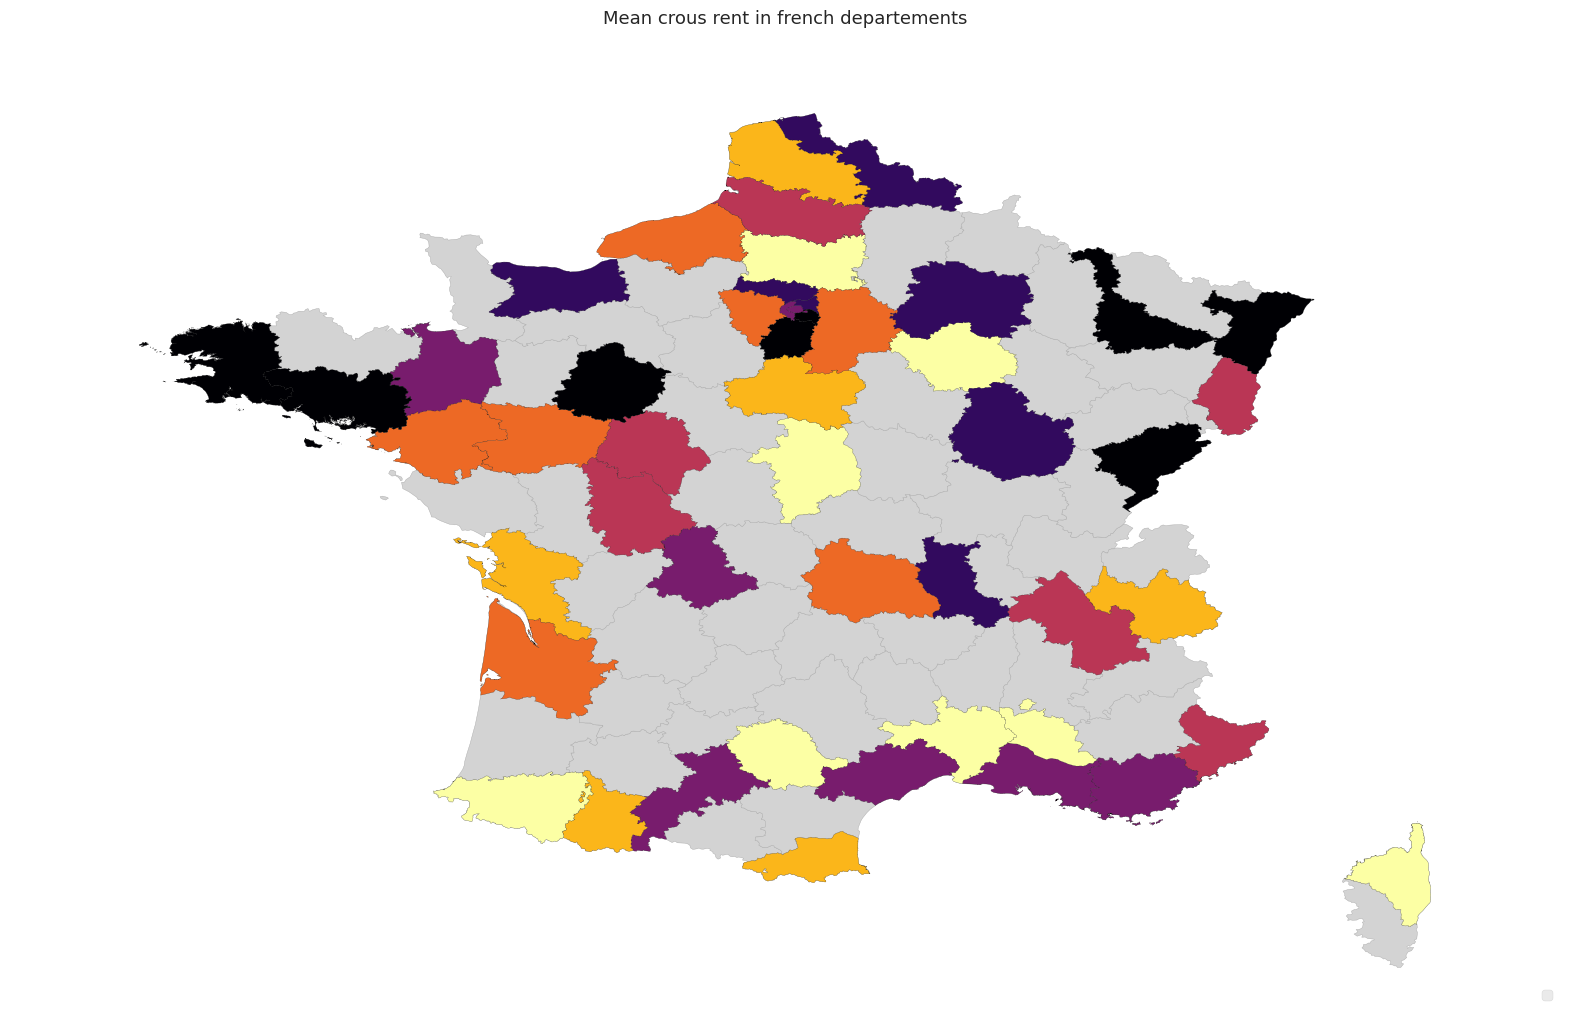

In [164]:

"""
On récupère un fond de carte de la France.
"""

France = gpd.read_file("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/france.geojson")

"""
Carte nb crous/nb élèves par départment
"""

fig, ax = plt.subplots(figsize=(20, 18))
France.plot(ax =ax, edgecolor='darkgrey', facecolor='lightgrey')

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(nb_residence_par_eleves['Nb_by_students'], k=7)

# Map
gplt.choropleth(nb_residence_par_eleves[(nb_residence_par_eleves["level_0"] != "Guyane") & (nb_residence_par_eleves["level_0"] != "La Réunion") &
                                        (nb_residence_par_eleves["level_0"] !="Martinique") & (nb_residence_par_eleves["level_0"] !="Guadeloupe")], 
    hue= "Nb_by_students" , 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
                
);
plt.legend()
plt.style.use("seaborn-notebook")
ax.legend(loc = 4)
ax.set_title('Mean crous rent in french departements', fontsize=13);



#### Statistiques générales des logements en résidence Crous en France   

In [34]:
df_stats = df[['Min Loyer', 'Max Loyer', 'Min Surface', 'Max Surface', 'prix_par_m2_surf_min', 'prix_par_m2_surf_max']]
df_stats.describe()

,Min Loyer,Max Loyer,Min Surface,Max Surface,prix_par_m2_surf_min,prix_par_m2_surf_max
count,481.000000,481.000000,504.000000,504.000000,376.000000,376.000000
mean,315.831705,416.287173,17.398373,28.274663,20.145139,17.254276
std,74.979906,112.564993,6.642630,15.237555,5.823618,6.163041
min,146.000000,146.000000,9.000000,9.000000,3.522727,3.522727
25%,258.000000,350.000000,15.000000,18.000000,16.661433,13.170366
50%,317.590000,403.000000,18.000000,25.000000,19.549706,17.543889
75%,362.000000,467.000000,19.000000,33.000000,23.268529,20.359944
max,635.000000,823.000000,88.000000,99.000000,68.777778,53.826087


##### On remarque que la location en prix au m2 en colocation est en générale plus faible que celle en studio, ce à quoi on pouvait s'attendre.

#### Est-ce que toutes les résidences Crous se ressemblent ? 

##### représentation des surfaces des logements crous 

Text(0.5, 1.0, 'Répartition des surfaces des logements dans les résidences Crous')

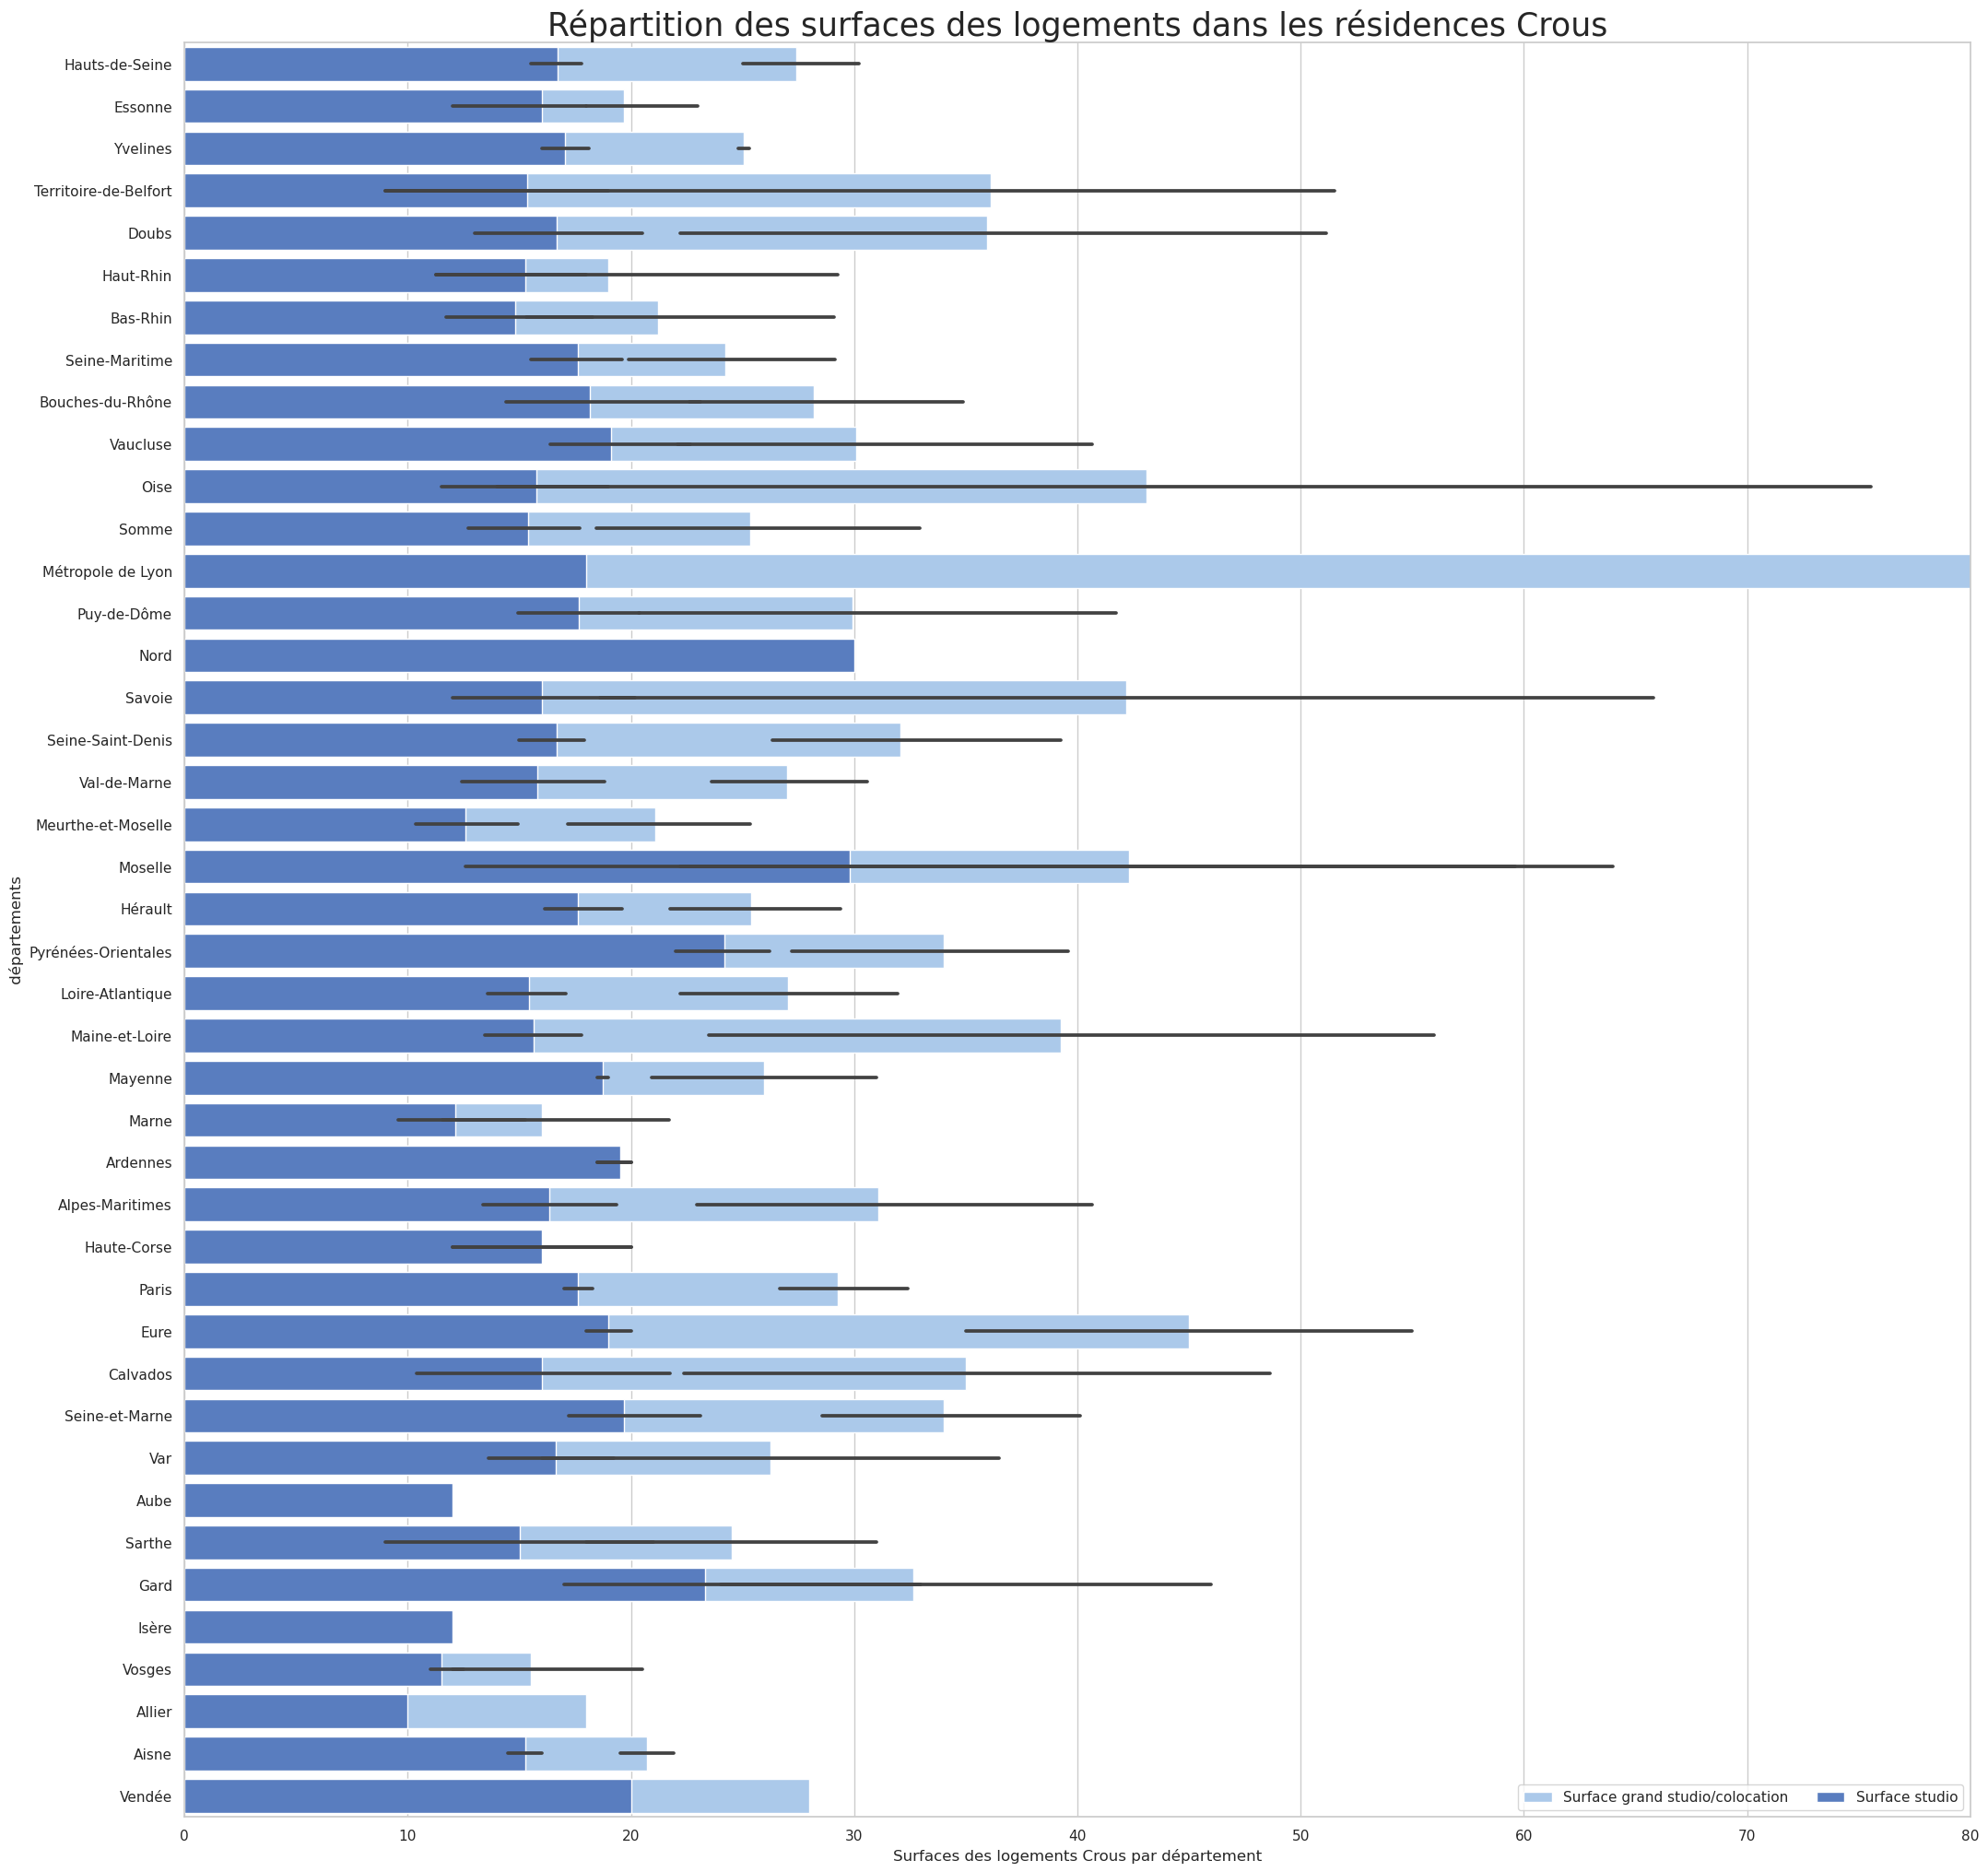

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Load the example car crash dataset
surfaces = df.dropna()

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y="departement", x="Max Surface", data=surfaces,
            label="Surface grand studio/colocation", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(y="departement", x="Min Surface", data=surfaces,
            label="Surface studio", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 80), ylabel=" départements ",
       xlabel="Surfaces des logements Crous par département")
plt.title("Répartition des surfaces des logements dans les résidences Crous", size = 25) 
#sns.despine(left=True, bottom=True)

In [71]:
df[df["departement"] == "Métropole de Lyon"]


,title,infos,address,geocalisation,regions,Loyer,Max Loyer,Min Loyer,Mean Loyer,Surface,...,Longitude,Latitude,geometry,LIBGEO,Loyer_prive_m2,departement,Schools,Nbstudents,prix_par_m2_surf_min,prix_par_m2_surf_max
45,Résidence André ALLIX,A 15mn de la Gare de Perrache dans un site cla...,2 rue Soeur Bouvier 69322 Lyon cedex 05,"45.7544598,4.8099977",Auvergne-Rhône-Alpes,"[240.0, 271.0, 333.0, 351.5, 260.0]",351.5,240.0,291.100000,[],...,4.809998,45.754460,POINT (4.81000 45.75446),Lyon 5e Arrondissement,19.290588,Métropole de Lyon,"[Centrale Lyon, École nationale supérieure des...",110738,NaN,NaN
46,Résidence CROIX DU SUD,A proximité de la mairie du 8ème et du campus ...,115 av. Général Frère 69008 Lyon,"45.7311314,4.8770665",Auvergne-Rhône-Alpes,"[392.0, 257.0]",392.0,257.0,324.500000,[],...,4.877066,45.731131,POINT (4.87707 45.73113),Lyon 8e Arrondissement,17.688787,Métropole de Lyon,"[Centrale Lyon, École nationale supérieure des...",110738,NaN,NaN
47,Résidence EINSTEIN,"A Villeurbanne, en face du campus de la Doua d...",1 bis av. Albert Einstein 69100 Villeurbanne,"45.7795339,4.8738076",Auvergne-Rhône-Alpes,"[394.0, 257.0]",394.0,257.0,325.500000,[],...,4.873808,45.779534,POINT (4.87381 45.77953),Villeurbanne,16.991434,Métropole de Lyon,"[Centrale Lyon, École nationale supérieure des...",110738,NaN,NaN
49,Résidence MONOD,"A Villeurbanne, en face du campus de la Doua d...",29 rue Marguerite 69100 Villeurbanne,"45.7781169,4.869984",Auvergne-Rhône-Alpes,[271.0],271.0,271.0,271.000000,[],...,4.869984,45.778117,POINT (4.86998 45.77812),Villeurbanne,16.991434,Métropole de Lyon,"[Centrale Lyon, École nationale supérieure des...",110738,NaN,NaN
51,Résidence BUGEAUD,Idéalement située dans un quartier très commer...,119 rue Bugeaud 69006 Lyon,"45.7671968,4.8519854",Auvergne-Rhône-Alpes,"[407.0, 336.0, 331.0]",407.0,331.0,358.000000,[],...,4.851985,45.767197,POINT (4.85199 45.76720),Lyon 6e Arrondissement,22.142784,Métropole de Lyon,"[Centrale Lyon, École nationale supérieure des...",110738,NaN,NaN
52,Résidence DES GIRONDINS,A 10mn de la gare et de la place Jean Macé et ...,39 rue Pré Gaudry 69007 Lyon,"45.7421836,4.8315848",Auvergne-Rhône-Alpes,"[406.0, 325.0]",406.0,325.0,365.500000,"[18.0, 20.0, 99.0]",...,4.831585,45.742184,POINT (4.83158 45.74218),Lyon 7e Arrondissement,17.969781,Métropole de Lyon,"[Centrale Lyon, École nationale supérieure des...",110738,18.055556,4.101010
53,Résidence SAINT EXUPERY,A proximité du campus Porte des Alpes de l’Uni...,92 avenue Jean Mermoz 69008 LYON,"45.7318584,4.8806706",Auvergne-Rhône-Alpes,"[397.0, 316.0, 312.0]",397.0,312.0,341.666667,[],...,4.880671,45.731858,POINT (4.88067 45.73186),Lyon 8e Arrondissement,17.688787,Métropole de Lyon,"[Centrale Lyon, École nationale supérieure des...",110738,NaN,NaN
235,Résidence Benjamin DELESSERT,"A 5mn de la gare et de la place Jean Macé, \r\...",145 avenue Jean Jaurès 69007 Lyon,"45.740754,4.839453",Auvergne-Rhône-Alpes,"[271.0, 404.0, 272.0]",404.0,271.0,315.666667,[],...,4.839453,45.740754,POINT (4.83945 45.74075),Lyon 7e Arrondissement,17.969781,Métropole de Lyon,"[Centrale Lyon, École nationale supérieure des...",110738,NaN,NaN
401,Résidence ARCHES D’AGRIPPA,A 10 mn du Vieux Lyon et de la Place Bellecour...,2 rue des Soeurs Bouvier 69005 Lyon,"45.7513542175,4.8079991341",Auvergne-Rhône-Alpes,[392.0],392.0,392.0,392.000000,[],...,4.807999,45.751354,POINT (4.80800 45.75135),Lyon 5e Arrondissement,19.290588,Métropole de Lyon,"[Centrale Lyon, École nationale supérieure des...",110738,NaN,NaN
402,Résidence GARIBALDI,A 300m des Universités Lyon 2 et Lyon 3 Quais ...,"360, rue Garibaldi 69007 Lyon","45.7462807,4.8470669",Auvergne-Rhône-Alpes,"[396.0, 257.0]",396.0,257.0,326.500000,[],...,4.847067,45.746281,POINT (4.84707 45.74628),Lyon 7e Arrondissement,17.969781,Métropole de Lyon,"[Centrale Lyon, École nationale supérieure des...",110738,NaN,NaN


#### Différences de prix entre les résidences Crous de France

/tmp/ipykernel_222/508078580.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ordered_df = df.dropna().groupby("departement").mean().sort_values(by='prix_par_m2_surf_max')


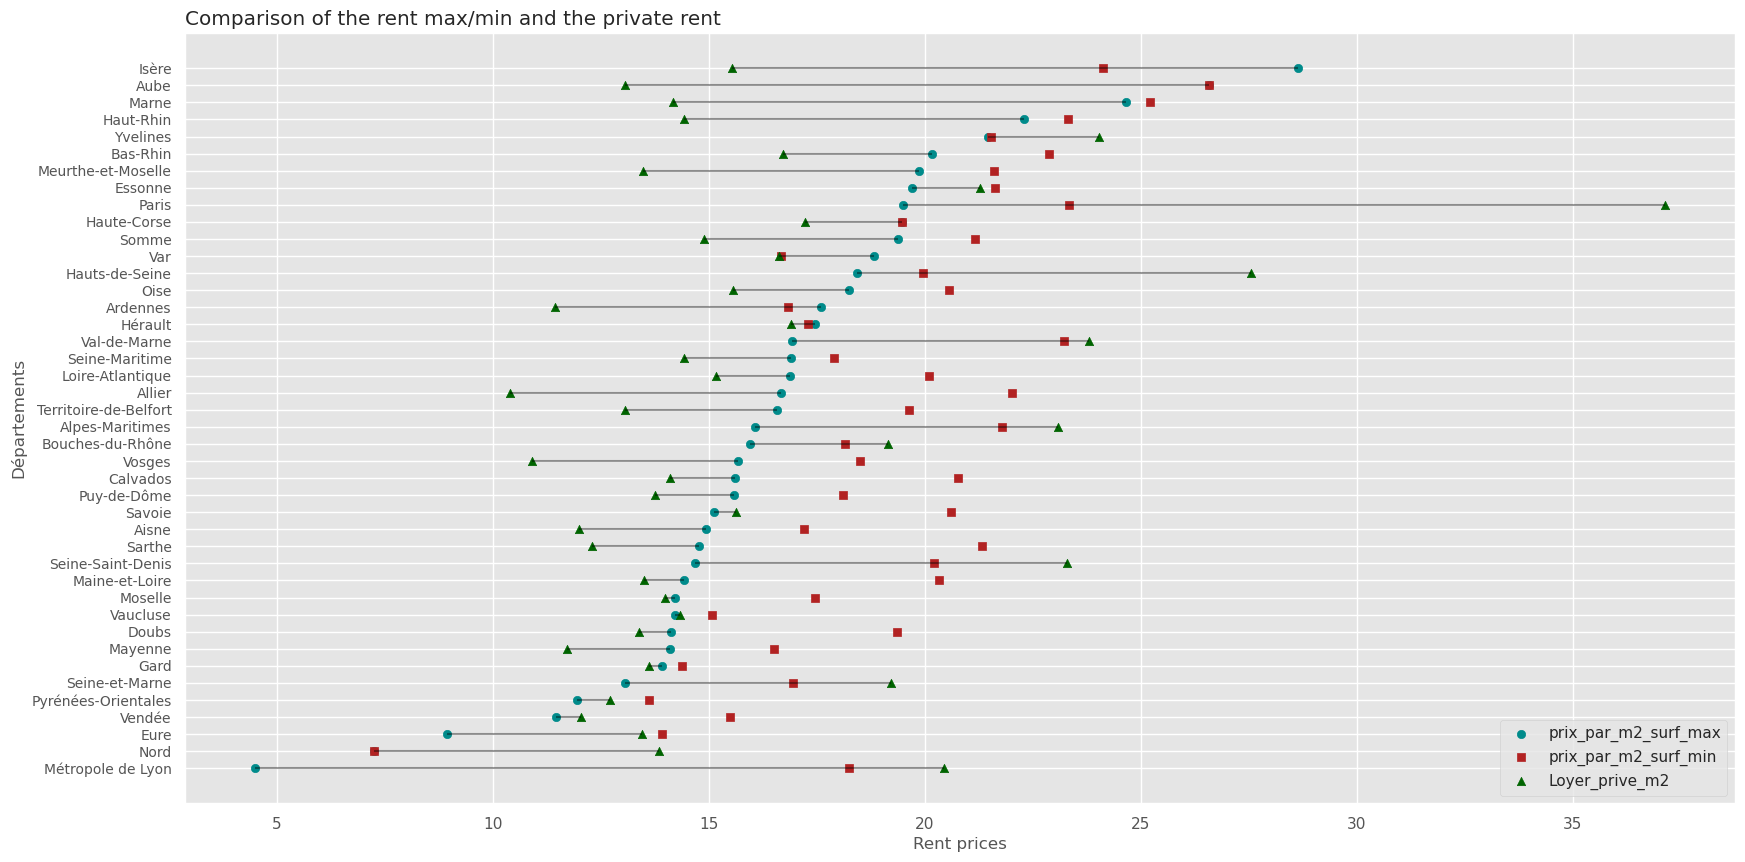

In [88]:
fig, ax = plt.subplots(figsize=(20, 10))
# Reorder it following the values of the first value:

ordered_df = df.dropna().groupby("departement").mean().sort_values(by='prix_par_m2_surf_max')
my_range=ordered_df.index
 
# The horizontal plot is made using the hline function
plt.hlines(y= my_range, xmin=ordered_df['prix_par_m2_surf_max'], xmax=ordered_df['Loyer_prive_m2'], color='black', alpha=0.4)
plt.scatter(ordered_df['prix_par_m2_surf_max'], my_range, color='darkcyan', alpha=1, marker = 'o', label='prix_par_m2_surf_max')
plt.scatter(ordered_df['prix_par_m2_surf_min'], my_range, color='firebrick', alpha=1,  marker = 's', label='prix_par_m2_surf_min')
plt.scatter(ordered_df['Loyer_prive_m2'], my_range, color='darkgreen', alpha=1 ,marker = '^', label='Loyer_prive_m2')
plt.legend()

    
# Add title and axis names
plt.yticks(my_range, ordered_df.index, fontsize= 10)
plt.title("Comparison of the rent max/min and the private rent", loc='left')
plt.xlabel('Rent prices')
plt.ylabel('Départements')
ax.legend(loc = 4, bbox_to_anchor = (1,0))
plt.style.use("ggplot")


# Show the graph
plt.show()

#### Disparités des résidences Crous en termes de loyer (Top 10 des résidences Crous les plus chers versus les moins chers)

In [ ]:
df3 = df.groupby(['departement']).mean().sort_values('prix_par_m2_surf_min') # Le dixième département le moins cher est Seine-et-Marne
df3['departements'] = df3.index 
df3 = df3[df3['prix_par_m2_surf_min']< 16.946296]
df3 = df3[['departements','prix_par_m2_surf_min']]  
df3

### même chose pour les 10 dépar

#### Répartition des étudiants dans l'enseignement supérieur en France 

In [ ]:
df3['departement'] = df3.index #je crée une colonne qui correspond à l'index (la colonne regions)

In [ ]:
df3 = df.groupby(['departement']).mean().sort_values('prix_par_m2_min')
df3 = df3.loc[(df3['prix_par_m2_min']>1)] 
df3['departement'] = df3.index
df3

In [ ]:
departments = df3['departement']
prix_m2 = df3['prix_par_m2_min']
plt.bar(departments,prix_m2)
plt.xticks(departments, rotation = 'vertical', size =8)
plt.xlabel('Départment')
plt.ylabel('Prix au m2 studio Crous par département')
plt.show()

## Ajout de la colonne 'prix_par_m2_max'(qui correspond le plus souvent à des logements en colocation (T2/T3/T4))

In [ ]:
df['prix_par_m2_max'] = df['Max Loyer']/df['Max Surface'] # On crée une nouvelle variable prix_par_m2_min 

In [ ]:
df_max = df.groupby(['departement']).mean().sort_values('prix_par_m2_max')
df_max = df_max.dropna()

In [ ]:
df_max['departement'] = df_max.index #je crée une colonne qui correspond à l'index (la colonne regions)
df_max

In [ ]:
departments = df_max['departement']
prix_m2_max = df_max['prix_par_m2_max']
plt.bar(departments,prix_m2_max)
plt.xticks(departments, rotation = 'vertical', size =8)
plt.xlabel('Départment')
plt.ylabel('Prix au m2 colocation Crous par département')
plt.show()

## Ajout de la colonne 'prix_par_m2_mean'(qui correspond à la moyenne des loyers des logements porposés) 

In [ ]:
df['prix_par_m2_mean'] = df['Mean Loyer']/df['Mean Surface'] # On crée une nouvelle variable prix_par_m2_mean
df

df_mean = df.groupby(['departement']).mean().sort_values('prix_par_m2_mean')
df_mean = df_mean.loc[(df_mean['prix_par_m2_mean']>1)] 
df_mean['departement'] = df_mean.index


In [ ]:
departments = df_mean['departement']
prix_m2_mean = df_mean['prix_par_m2_mean']
plt.bar(departments,prix_m2_mean)
plt.xticks(departments, rotation = 'vertical', size =8)
plt.xlabel('Départment')
plt.ylabel('Prix au m2 moyen Crous par département')
plt.show()

## Construction de graphes pour surfaces min et max 

In [ ]:
df_surface_min = df.groupby(['departement']).mean().sort_values('Min Surface')
df_surface_min

In [ ]:
df_surface_min = df_surface_min.groupby(['departement']).mean().sort_values('Min Surface')
df_surface_min = df_surface_min.dropna()
df_surface_min = df_surface_min.loc[(df_surface_min['Min Surface']>1)] 
df_surface_min['departement'] = df_surface_min.index


In [ ]:
departments = df_surface_min['departement']
Min_Surface = df_surface_min['Min Surface']
plt.bar(departments,Min_Surface)
plt.xticks(departments, rotation = 'vertical', size =7)
plt.xlabel('Départment')
plt.ylabel('Surface minimale studio Crous par département')
plt.show()

In [ ]:
df_surface_max = df.groupby(['departement']).mean().sort_values('Max Surface')
df_surface_max 
df_surface_max = df_surface_max.loc[(df_surface_max['Max Surface']>1)] 
df_surface_max['departement'] = df_surface_max.index


In [ ]:
df_surface_max = df.groupby(['departement']).mean().sort_values('Max Surface')
df_surface_max = df_surface_max.dropna()

In [ ]:
departments = df_surface_max.index
Max_Surface = df_surface_max['Max Surface']

plt.bar(departments,Max_Surface)
plt.xticks(departments, rotation = 'vertical', size =7)
plt.xlabel('Départment')
plt.ylabel('Surface maximale colocation Crous par département')
plt.show()

## Compter le nombre de residence Crous par région 

In [103]:
df['comptage_résidence']= 1
df.head(5)
df_nb_res = df.groupby(['departement']).sum().sort_values('comptage_résidence', ascending = False)

df_nb_res['departement'] = df_nb_res.index #je crée une colonne qui correspond à l'index (la colonne regions)

df_nb_res

df_nb_res_moins = df_nb_res.loc[(df_nb_res['comptage_résidence']<5)] 
#sns.barplot(y='departement', x='comptage_résidence', data= df_nb_res, width= 0.2, orient="h").set_title('Nombre de résidence par départements')#OK 

/tmp/ipykernel_222/386916076.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_nb_res = df.groupby(['departement']).sum().sort_values('comptage_résidence', ascending = False)


In [ ]:
departments = df_nb_res_moins['departement']
Nb_résidence = df_nb_res_moins['comptage_résidence']
plt.bar(departments,Nb_résidence )
plt.xticks(departments, rotation = 'vertical', size =7)
plt.xlabel('Départments')
plt.ylabel('Départements avec moins de 5 résidences Crous')
plt.show()

## Des jolies graphiques 

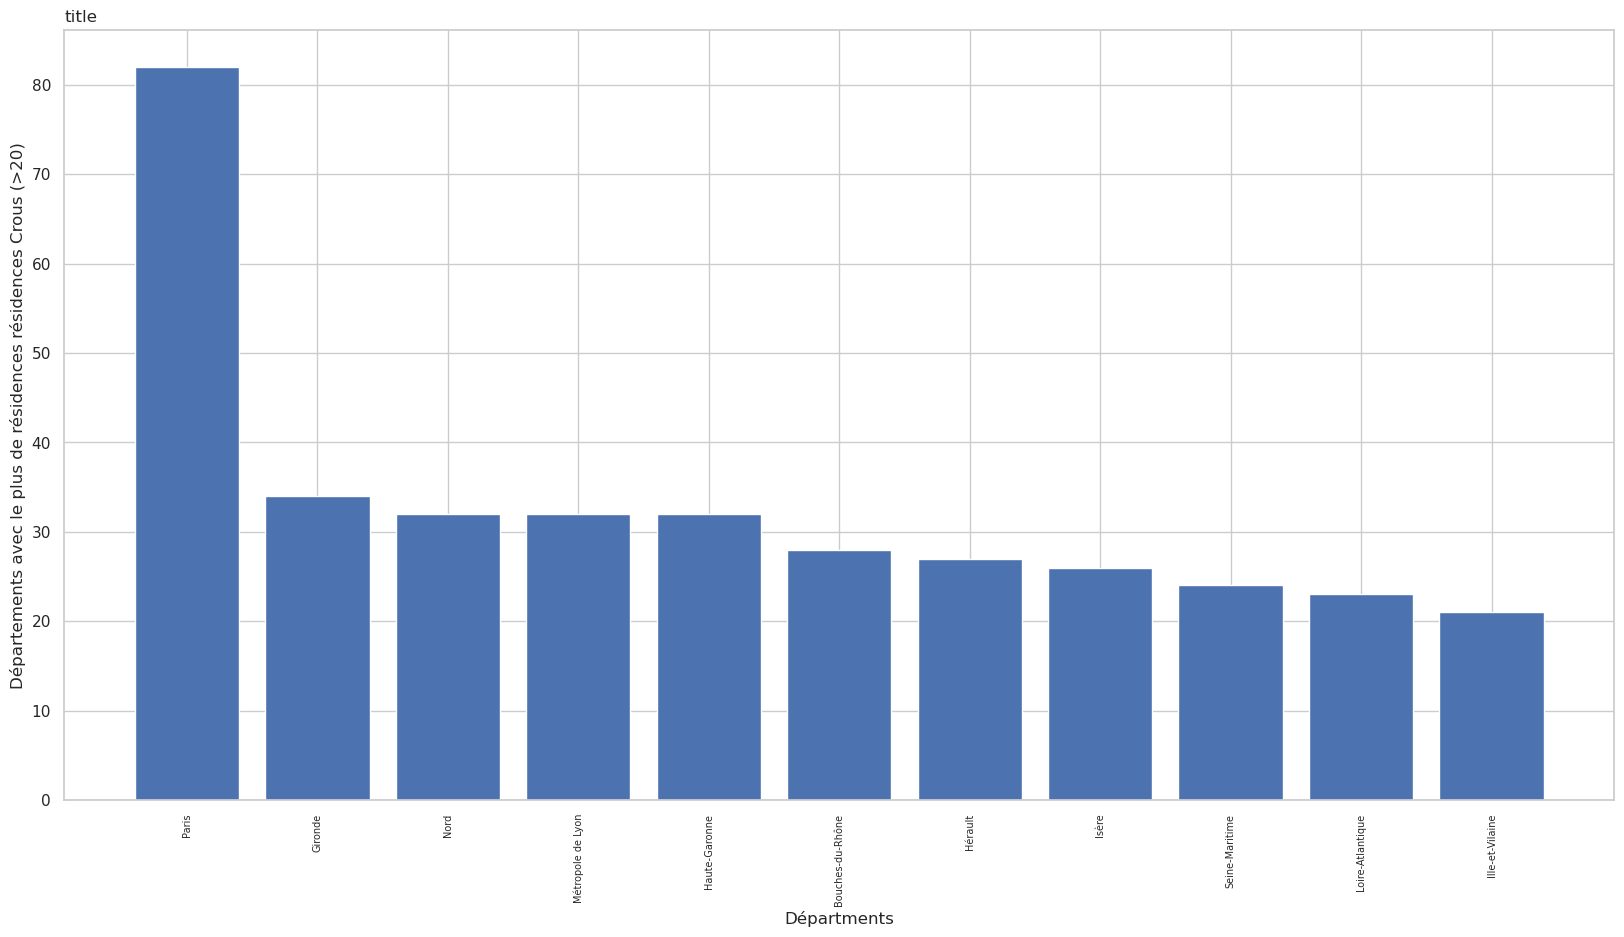

In [104]:

df_nb_res_plus = df_nb_res.loc[(df_nb_res['comptage_résidence']>20)] 
departments = df_nb_res_plus['departement']
Nb_résidence = df_nb_res_plus['comptage_résidence']

fig, ax = plt.subplots(figsize=(20, 10)) #taille adéquate 

plt.bar(departments,Nb_résidence )
plt.xticks(departments, rotation = 'vertical', size =7)
plt.title("title", loc='left')
plt.xlabel('Départments') 
plt.ylabel('Départements avec le plus de résidences résidences Crous (>20)')
plt.style.use("ggplot") #à utiliser pour améliorer le style 
plt.show()

In [106]:
df_nb_res_plus.groupby(df_nb_res_plus.index).sum()

/tmp/ipykernel_222/178103143.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_nb_res_plus.groupby(df_nb_res_plus.index).sum()


,Max Loyer,Min Loyer,Mean Loyer,Max Surface,Min Surface,Mean Surface,Longitude,Latitude,Loyer_prive_m2,Nbstudents,prix_par_m2_surf_min,prix_par_m2_surf_max,comptage_résidence
departement,,,,,,,,,,,,,
Bouches-du-Rhône,10827.29,7650.18,9219.552652,648.30,417.50,531.793182,151.773501,1215.427789,533.726295,1027509,417.130337,366.924128,28
Gironde,0.00,0.00,0.000000,159.00,80.00,117.500000,-20.515073,1523.567818,585.235474,2239676,0.000000,0.000000,34
Haute-Garonne,0.00,0.00,0.000000,670.70,333.50,507.766667,46.440533,1394.605280,488.056563,2794898,0.000000,0.000000,32
Hérault,11024.00,8088.00,9397.774747,634.19,440.47,535.216667,103.965284,1177.624613,456.589918,1819480,432.087902,436.199418,27
Ille-et-Vilaine,0.00,0.00,0.000000,104.00,87.00,95.833333,-35.276098,1010.522485,308.662328,1182216,0.000000,0.000000,21
Isère,4657.00,3440.00,4003.166667,24.00,24.00,24.000000,149.353753,1174.884301,409.938612,1507064,48.250000,57.250000,26
Loire-Atlantique,8858.19,6683.25,7704.544333,622.00,355.00,470.935000,-37.172073,1086.516643,348.731974,932274,462.231199,387.949790,23
Métropole de Lyon,11912.00,9027.00,10383.725000,182.00,36.00,96.166667,155.273706,1464.198973,580.702358,3540484,36.500000,8.992576,32
Nord,217.00,217.00,217.000000,375.00,375.00,375.000000,101.394896,1618.646439,507.578802,1372377,7.233333,7.233333,32


KeyError: 'prix_par_m2_max'

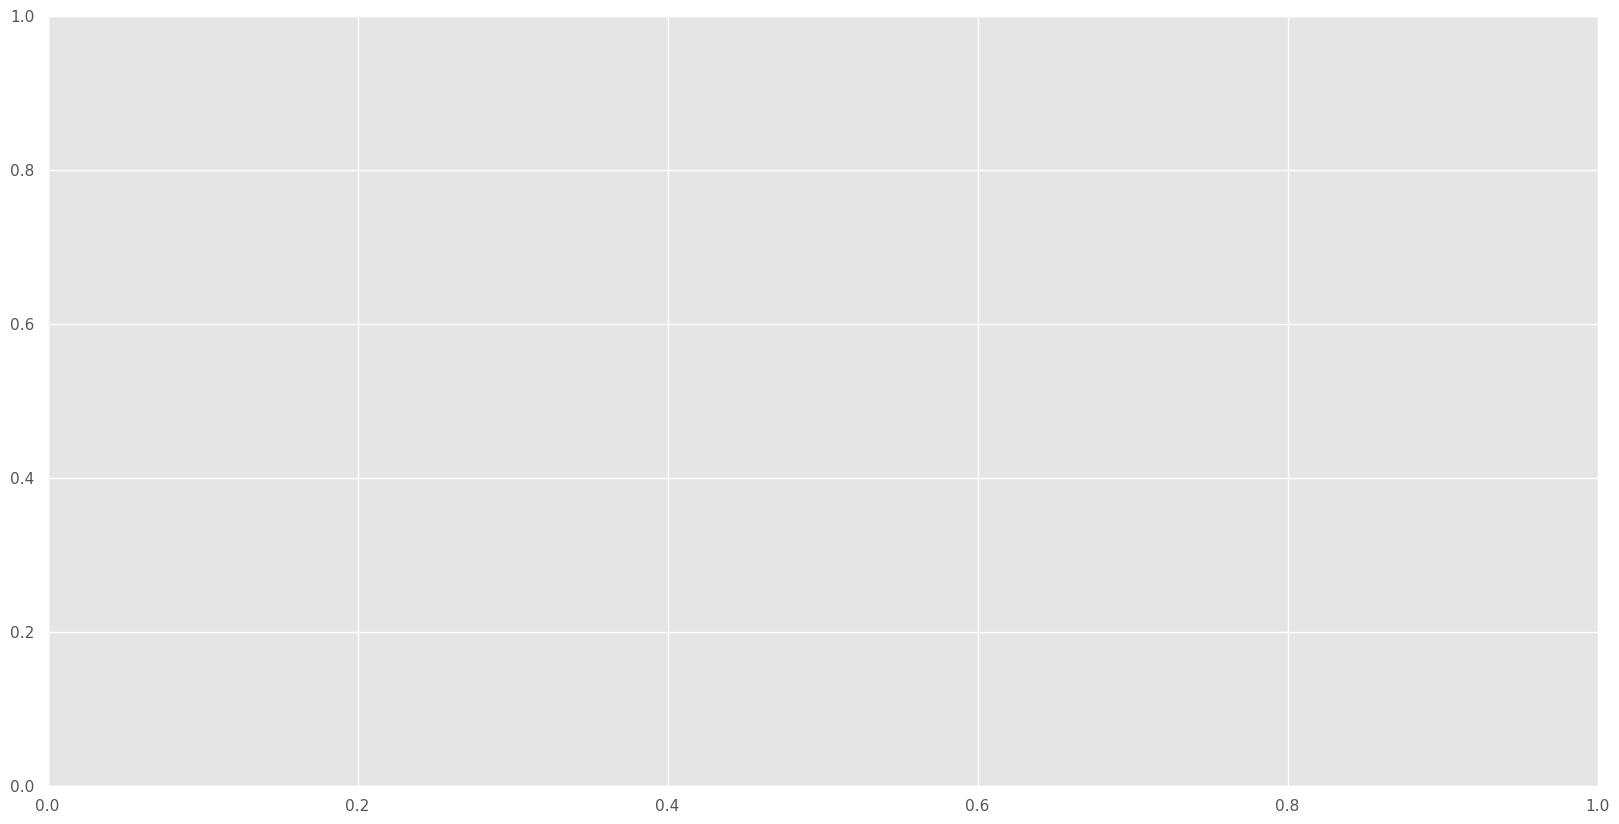

In [75]:
fig, ax = plt.subplots(figsize=(20, 10))
# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='prix_par_m2_max')
my_range=ordered_df['departement']
 
# The horizontal plot is made using the hline function
plt.hlines(y= my_range, xmin=ordered_df['prix_par_m2_max'], xmax=ordered_df['Loyer_prive_m2'], color='black', alpha=0.4)
plt.scatter(ordered_df['prix_par_m2_max'], my_range, color='darkcyan', alpha=1, marker = 'o', label='prix_par_m2_max')
plt.scatter(ordered_df['prix_par_m2_min'], my_range, color='firebrick', alpha=1,  marker = 's', label='prix_par_m2_min')
plt.scatter(ordered_df['Loyer_prive_m2'], my_range, color='darkgreen', alpha=1 ,marker = '^', label='Loyer_prive_m2')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['departement'], fontsize= 10)
plt.title("Comparison of the rent max/min and the private rent", loc='left')
plt.xlabel('Rent prices')
plt.ylabel('Départements')
ax.legend(loc = 4, bbox_to_anchor = (1,0))
plt.style.use("ggplot")


# Show the graph
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
# Reorder it following the values of the first value:
ordered_df = df_max.sort_values(by='Loyer_prive_m2')
my_range=ordered_df['departement']
 
# The horizontal plot is made using the hline function
plt.hlines(y= my_range, xmin=ordered_df['prix_par_m2_max'], xmax=ordered_df['Loyer_prive_m2'], color='black', alpha=0.4)
plt.scatter(ordered_df['prix_par_m2_max'], my_range, color='darkcyan', alpha=1, marker = 'o', label='prix_par_m2_max')
plt.scatter(ordered_df['prix_par_m2_min'], my_range, color='firebrick', alpha=1,  marker = 's', label='prix_par_m2_min')
plt.scatter(ordered_df['Loyer_prive_m2'], my_range, color='darkgreen', alpha=1 ,marker = '^', label='Loyer_prive_m2')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['departement'], fontsize= 10)
plt.title("Comparison of the rent max/min and the private rent", loc='left')
plt.xlabel('Rent prices')
plt.ylabel('Départements')
ax.legend(loc = 4, bbox_to_anchor = (1,0))
plt.style.use("ggplot")


# Show the graph
plt.show()

## 2.2 La France des Crous

On retire les territoires et régions d'Outre-Mer pour réaliser des carte

In [98]:
df_metro = df[ (df["regions"] != "La Réunion") &

                    (df["regions"] != "Guadeloupe") &

                    (df["regions"] != "Martinique") &

                    (df["regions"] != "Guyane")]

df_metro.reset_index(inplace = True)


### 2.2.1 Classical maps

In [ ]:

"""
On récupère un fond de carte de la France.
"""

France = gpd.read_file("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/france.geojson")


In [ ]:
fig, ax = plt.subplots(figsize=(24, 18))
plt.style.use("default")
France.plot(ax =ax, edgecolor='darkgrey', facecolor='lightgrey')

df_metro.plot(ax = ax, color='red') 



### 2.2.2. Interactive maps

In [ ]:
map = folium.Map(location=[48.7144587, 2.2453842], tiles="OpenStreetMap", zoom_start=11)

# Create a geometry list from the GeoDataFrame

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in df_metro.geometry] 


# Iterate through list and add a marker for each residence, color-coded by its type.

i = 0

for coordinates in geo_df_list:

    # Place the markers with the popup labels and data

    map.add_child(

        folium.Marker(

            location=coordinates,

            popup=

                 "Name: " + str(df_metro.title[i]) + "<br>"

                + "Moyenne Loyer: " + str(df_metro["Mean Loyer"][i]) + "<br>"

                + "Moyenne surface: " + str(df_metro["Mean Surface"][i]) + "<br>"

                + "Address: " + str(df_metro.address[i]) + "<br>"

                + "Coordinates: " + str(geo_df_list[i])

            ,

        

            icon=folium.Icon(color="blue"),

        )

    )

    i = i + 1

map

### 2.2.3 cartes statistiques 

In [ ]:
gdf_mean = df_metro.groupby(['departement']).mean()
gdf_mean['departement'] = gdf_mean.index
gdf_mean

In [ ]:
gpd_mean = gpd.GeoDataFrame(gdf_mean.set_index('departement').join(gdf_dep.set_index('departement')))

In [ ]:
gpd_mean_wout_nan = gpd_mean.dropna()

In [ ]:
gpd_mean_wout_nan

In [ ]:
fig, ax = plt.subplots(figsize=(20, 18))
France.plot(ax =ax, edgecolor='darkgrey', facecolor='lightgrey')

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(gpd_mean_wout_nan['prix_par_m2_max'], k=7)

# Map
gplt.choropleth(gpd_mean_wout_nan, 
    hue="prix_par_m2_mean", 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
                
);
plt.style.use("seaborn-notebook")
ax.legend(loc = 4, bbox_to_anchor = (1,0))
plt.subplots_adjust()
ax.set_title('Mean crous rent in french departements', fontsize=13);



In [ ]:
df_max_bis = df_max[df_max["departement"] != "Guadeloupe"]
df_max_bis
gpd_mean = gpd.GeoDataFrame(df_max_bis.join(gdf_dep.set_index('departement')))
gpd_mean

In [ ]:
fig, ax = plt.subplots(figsize=(15, 18))
France.plot(ax =ax, edgecolor='darkgrey', facecolor='lightgrey')

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(gpd_mean['prix_par_m2_min'], k=5)

# Map
gplt.choropleth(gpd_mean, 
    hue="prix_par_m2_min", 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

ax.set_title('Mean crous rent in french "departements" with residences', fontsize=13)
#df_metro.plot(ax = ax, color='darkgreen', alpha = 1, markersize = 5);

In [ ]:
df_metro

NameError: name 'gpd_mean' is not defined

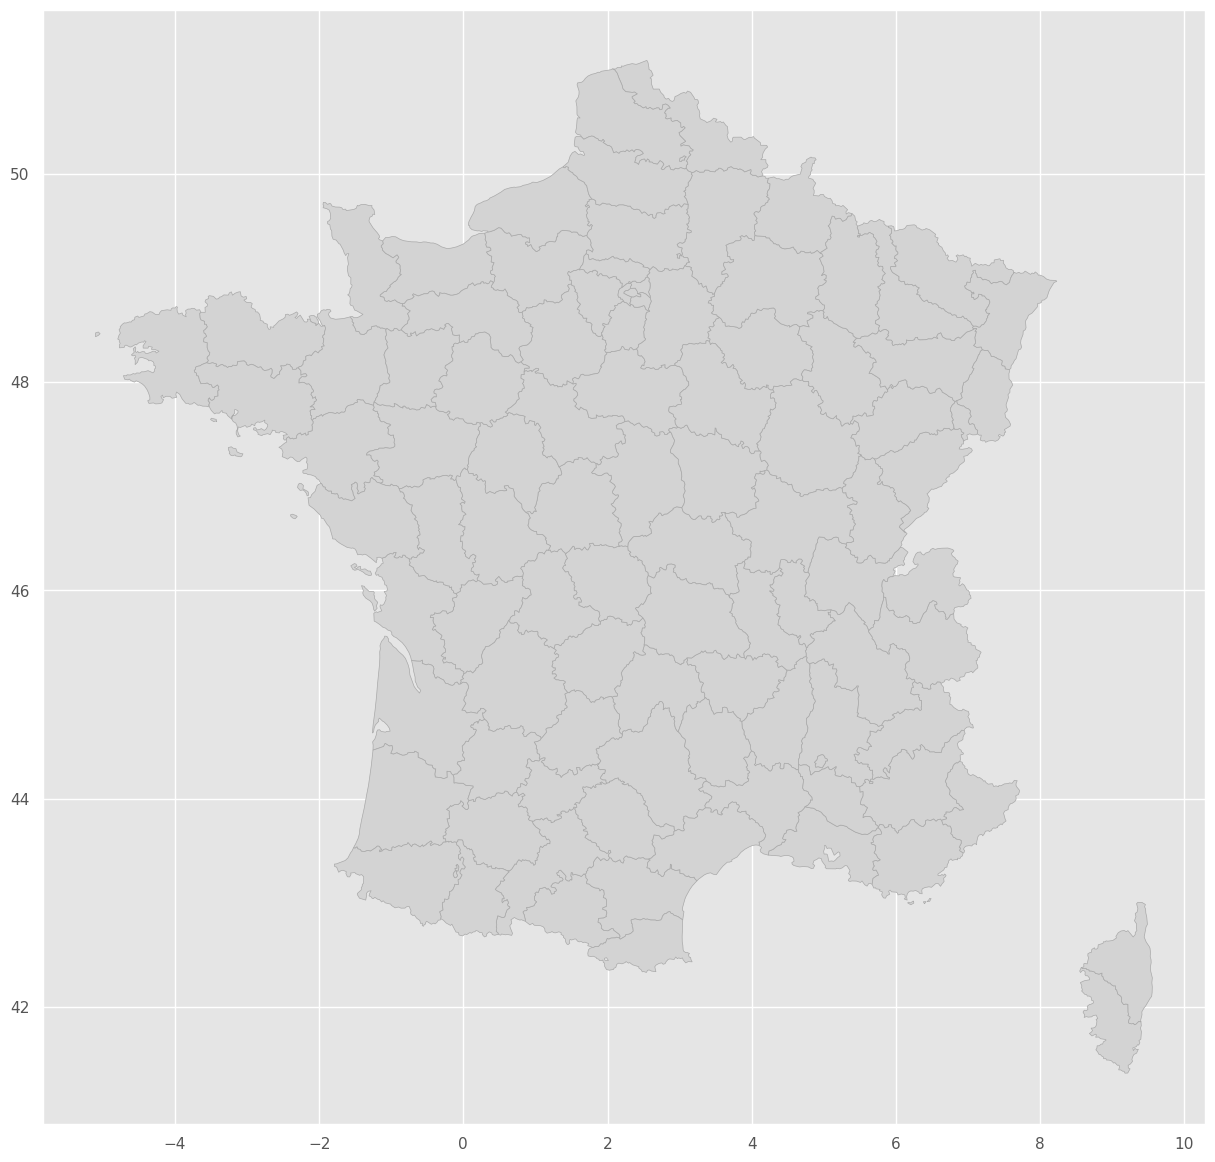

In [149]:
fig, ax = plt.subplots(figsize=(15, 18))
France.plot(ax =ax, edgecolor='darkgrey', facecolor='lightgrey')

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(gpd_mean['prix_par_m2_min'], k=5)

# Map
gplt.choropleth(gpd_mean, 
    hue="prix_par_m2_min", 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

ax.set_title('Mean crous rent in french "departements" with residences', fontsize=13)
df_metro.plot(ax = ax, color='darkgreen', alpha = 1, markersize = 5);

In [ ]:
fig, ax = plt.subplots(figsize=(15, 18))
France.plot(ax =ax, edgecolor='darkgrey', facecolor='lightgrey')
import mapclassify as mc
scheme = mc.Quantiles(gpd_mean_wout_nan['prix_par_m2_mean'], k=10)

# Map
gplt.choropleth(gpd_mean_wout_nan, 
    hue="prix_par_m2_mean", 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax);

# Modélisation 

On commence par enlever les NaN du dataframe qui bloquent la regression linéaire

In [ ]:
from sklearn.linear_model import LinearRegression
import math
from sklearn.model_selection import train_test_split

In [ ]:
df.isnull().sum()
df2 = df
index_with_nan = df2.index[df2.isnull().any(axis=1)]
print(index_with_nan.shape)
df2.drop(index_with_nan,0, inplace=True)
df2[['Mean Loyer', 'Mean Surface']].isnull().sum()

In [ ]:
df2 = df2.reset_index()
df2

Régression linéaire de la moyenne des loyers sur la moyenne des surfaces

In [ ]:
df2['Mean Surface'].describe()

In [ ]:
var_explicatives = df2['Mean Surface']
YLoyer = df2['Mean Loyer']
#on transforme Y et X en array que l'on reformate
YLoyer = np.array(YLoyer).reshape(-1,1)
var_explicatives = (np.array(var_explicatives).reshape(-1,1))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(var_explicatives,YLoyer,test_size=0.3,train_size=0.7)
lin= LinearRegression()
reg = lin.fit(X_train,Y_train)
pred_train = lin.predict(X_train)
pred_test = lin.predict(X_test)

coefficients_sans_cst= reg.coef_
r_2 = reg.score(X_train,Y_train)
print(r_2)
print(coefficients_sans_cst)

In [ ]:

plt.scatter(X_train, Y_train, color='red') # plotting the observation line
 
plt.plot(X_train, lin.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Loyer moyen vs Surface moyenne (Training set)") # stating the title of the graph
 
plt.xlabel("Surface moyenne") # adding the name of x-axis
plt.ylabel("Loyer moyen") # adding the name of y-axis
plt.show() # specifies end of graph


In [ ]:
#Deuxième essai: regression linéaire du min Loyer sur min surface 

In [ ]:
df2[['Min Loyer', 'Min Surface']].isnull().sum()

In [ ]:
X_min_surface = df2['Min Surface'] #la variable explicative
Y_min_Loyer = df2['Min Loyer']
#on transforme Y et X en array que l'on reformate
Y_min_Loyer = np.array(Y_min_Loyer).reshape(-1,1)
X_min_surface = (np.array(X_min_surface).reshape(-1,1))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_min_surface,Y_min_Loyer,test_size=0.2,train_size=0.8)
lin= LinearRegression()
reg = lin.fit(X_train,Y_train)
pred_train = lin.predict(X_train)
pred_test = lin.predict(X_test)

coefficients_sans_cst= reg.coef_
r_2 = reg.score(X_train,Y_train)
print(r_2)
print(coefficients_sans_cst) 

In [ ]:
#avec la régression du min Loyer sur min Surface, on a un R² peu significatif

In [ ]:
#Regression linéaire du Loyer sur le nombre total d'étudiants

In [ ]:
df2['Nbstudents_total'].describe()

In [ ]:
X_Nbstudents = df2['Nbstudents_total'] #la variable explicative
YLoyer = df2['Mean Loyer']
#on transforme Y et X en array que l'on reformate
YLoyer = np.array(YLoyer).reshape(-1,1)
X_Nbstudents = (np.array(X_Nbstudents).reshape(-1,1))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_Nbstudents,YLoyer,test_size=0.2,train_size=0.8)
lin= LinearRegression()
reg = lin.fit(X_train,Y_train)
pred_train = lin.predict(X_train)
pred_test = lin.predict(X_test)

coefficients_sans_cst= reg.coef_
r_2 = reg.score(X_train,Y_train)
print(r_2)
print(coefficients_sans_cst) 

In [ ]:
plt.scatter(X_train, Y_train, color='red') # plotting the observation line
 
plt.plot(X_train, lin.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Loyer moyen vs Surface moyenne (Training set)") # stating the title of the graph
 
plt.xlabel("Surface moyenne") # adding the name of x-axis
plt.ylabel("Loyer moyen") # adding the name of y-axis
plt.show() # specifies end of graph

In [ ]:
#Regression linéaire du Loyer sur le LOG du nombre total d'étudiants

In [ ]:
for i in range (0, (np.shape(df2['Nbstudents_total']))[0]): 
    if  df2['Nbstudents_total'][i]==0: 
        df2['Nbstudents_total'][i]=1 #cela permet de ne pas avoir de valeur 0 quand on applique le log
df2['Nbstudents_total'].describe()

len(df2[df2['Nbstudents_total']==0])

In [ ]:
X_log_Nbstudents = np.log(df2['Nbstudents_total']) #la variable explicative
YLoyer = df2['Mean Loyer']
#on transforme Y et X en array que l'on reformate
YLoyer = np.array(YLoyer).reshape(-1,1)
X_log_Nbstudents = (np.array(X_log_Nbstudents).reshape(-1,1))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_log_Nbstudents,YLoyer,test_size=0.2,train_size=0.8)
lin= LinearRegression()
reg = lin.fit(X_train,Y_train)
pred_train = lin.predict(X_train)
pred_test = lin.predict(X_test)

coefficients_sans_cst= reg.coef_
r_2 = reg.score(X_train,Y_train)
print(r_2)
print(coefficients_sans_cst) 

In [ ]:
df2.columns

In [ ]:
#régression linéaire du 